<a href="https://colab.research.google.com/github/Jan12s/betterlifeindex/blob/main/better_life_index_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESEARCH QUESTION: Which external factors impacted education in 2018, and did better education mean people were more satisfied with life?

BETTER LIFE INDEX B

In [1]:
import pandas as pd

# Step 1: Load the data
url = 'https://raw.githubusercontent.com/Jan12s/betterlifeindex/refs/heads/main/OECD.WISE.WDP%2CDSD_HSL%40DF_HSL_CWB%2C1.1%2BAUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA%2BARG%2BBRA%2BBGR%2BHRV%2BIDN%20(1).csv'
df = pd.read_csv(url)

# Step 2: Keep just what we need
df = df[['REF_AREA', 'TIME_PERIOD', 'MEASURE', 'OBS_VALUE']]
df = df.rename(columns={
    'REF_AREA': 'country',
    'TIME_PERIOD': 'year',
    'MEASURE': 'indicator',
    'OBS_VALUE': 'value'
})

# Step 3: Drop missing values
df = df.dropna(subset=['value'])

# Step 4: Pivot so each indicator becomes a column
df_clean = df.pivot_table(index=['country', 'year'], columns='indicator', values='value').reset_index()

# Step 5: Drop rows with any missing values across indicators
df_clean = df_clean.dropna()

# Show the clean data
print(df_clean.head())
print("Clean data shape:", df_clean.shape)


indicator country  year      11_1       2_4      3_4  3_5         6_1  \
56            AUT  2018  8.002416  9.220276  87.6856  1.6  484.392568   
77            BEL  2018  7.580024  9.429950  83.7276  5.2  492.864439   
245           CZE  2018  7.351978  5.793651  85.7682  2.7  490.218815   
266           DEU  2018  7.358130  6.987309  90.2508  2.7  498.279257   
287           DNK  2018  7.761102  9.061315  90.2963  3.0  501.129934   

indicator    6_1_DEP   6_1_VER         6_2    6_2_DEP   6_2_VER         6_3  \
56         13.512053  1.749492  498.942314  13.512053  1.653118  489.780439   
77         12.488838  1.769670  508.070306  12.488838  1.668829  498.773127   
245        10.515503  1.701419  499.467651  10.515503  1.639396  496.791311   
266        12.815182  1.786301  500.043781  12.815182  1.664745  502.988903   
287         8.142326  1.625112  509.398375   8.142326  1.530610  492.637033   

indicator    6_3_DEP   6_3_VER        7_1   7_1_DEP        9_2  9_3  
56         13.51

In [2]:
df.head()

,country,year,indicator,value
0,AUS,2016,7_1_DEP,6.041596
1,AUS,2015,7_1_DEP,6.041596
2,AUS,2014,7_1_DEP,6.041596
3,AUS,2013,7_1_DEP,5.324185
4,AUS,2012,7_1_DEP,5.324185


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    6763 non-null   object 
 1   year       6763 non-null   int64  
 2   indicator  6763 non-null   object 
 3   value      6763 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 211.5+ KB
None


In [4]:
print(df['indicator'].unique())


['7_1_DEP' '6_2_VER' '6_1_VER' '6_3_VER' '6_3_DEP' '6_2_DEP' '6_1_DEP'
 '9_2' '11_1' '6_2' '6_3' '6_1' '7_1' '9_3' '3_4' '2_4' '3_5']


In [5]:
df[['indicator', 'value', 'country', 'year']].drop_duplicates().head(20)


,indicator,value,country,year
0,7_1_DEP,6.041596,AUS,2016
1,7_1_DEP,6.041596,AUS,2015
2,7_1_DEP,6.041596,AUS,2014
3,7_1_DEP,5.324185,AUS,2013
4,7_1_DEP,5.324185,AUS,2012
5,7_1_DEP,5.324185,AUS,2011
6,6_2_VER,1.640049,AUS,2018
7,6_1_VER,1.795876,AUS,2018
8,6_3_VER,1.777801,AUS,2022
9,6_2_VER,1.727050,AUS,2022


In [6]:
print(df['country'].unique())


['AUS' 'AUT' 'BEL' 'CAN' 'CHL' 'COL' 'CRI' 'CZE' 'DNK' 'EST' 'FIN' 'FRA'
 'DEU' 'GRC' 'HUN' 'ISL' 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'LVA' 'LTU' 'LUX'
 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK' 'SVN' 'ESP' 'SWE' 'CHE' 'TUR'
 'GBR' 'USA' 'ARG' 'BRA' 'BGR' 'HRV' 'IDN' 'PER' 'ROU' 'ZAF' 'THA']


In [7]:
print(df['indicator'].unique())


['7_1_DEP' '6_2_VER' '6_1_VER' '6_3_VER' '6_3_DEP' '6_2_DEP' '6_1_DEP'
 '9_2' '11_1' '6_2' '6_3' '6_1' '7_1' '9_3' '3_4' '2_4' '3_5']


In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/Jan12s/betterlifeindex/refs/heads/main/OECD.WISE.WDP%2CDSD_HSL%40DF_HSL_CWB%2C1.1%2BAUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA%2BARG%2BBRA%2BBGR%2BHRV%2BIDN%20(1).csv"
df = pd.read_csv(url)


df = df.rename(columns={
    'MEASURE': 'indicator',
    'REF_AREA': 'country',
    'TIME_PERIOD': 'year',
    'OBS_VALUE': 'value'
})

df = df[['indicator', 'value', 'country', 'year']]


indicator_map = {
    '11_1': 'education',
    '9_2': 'life_satisfaction',
    '2_4': 'internet_access',
    '3_4': 'air_pollution',
    '3_5': 'water_quality',
    '7_1_DEP': 'social_support',
}

# Filter for your selected indicators only
df = df[df['indicator'].isin(indicator_map.keys())]

# Replace codes with clear names
df['indicator'] = df['indicator'].map(indicator_map)

# Pivot so each indicator becomes a column
df_pivot = df.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

# Drop rows with any missing values
df_clean = df_pivot.dropna()

# Show result
print(df_clean.head())
print("\nShape:", df_clean.shape)


indicator country  year  air_pollution  education  internet_access  \
51            AUT  2013        79.7862   7.810006         8.780428   
56            AUT  2018        87.6856   8.002416         9.220276   
72            BEL  2013        78.6488   7.528975        13.021009   
77            BEL  2018        83.7276   7.580024         9.429950   
152           CHE  2009        73.9000   8.143000         9.546423   

indicator  life_satisfaction  social_support  water_quality  
51                 99.999077        5.323621            2.7  
56                 99.986755        7.208514            1.6  
72                 99.962799        7.539228            5.8  
77                 99.962578        8.764923            5.2  
152                99.943962        6.121666            7.6  

Shape: (57, 8)


In [9]:
df.shape

(3798, 4)

In [10]:
df.head(20)

,indicator,value,country,year
0,social_support,6.041596,AUS,2016
1,social_support,6.041596,AUS,2015
2,social_support,6.041596,AUS,2014
3,social_support,5.324185,AUS,2013
4,social_support,5.324185,AUS,2012
5,social_support,5.324185,AUS,2011
17,life_satisfaction,98.730392,AUS,2008
18,life_satisfaction,98.261719,AUS,2007
19,life_satisfaction,98.660629,AUS,2006
20,life_satisfaction,98.829361,AUS,2005


In [11]:
df_wide = df.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

print(df_wide.head())


indicator country  year  air_pollution  education  internet_access  \
0             ARG  2004            NaN        NaN              NaN   
1             ARG  2005            NaN        NaN              NaN   
2             ARG  2006            NaN        NaN              NaN   
3             ARG  2007            NaN        NaN              NaN   
4             ARG  2008            NaN        NaN              NaN   

indicator  life_satisfaction  social_support  water_quality  
0                  99.875931             NaN            NaN  
1                  99.875847             NaN            NaN  
2                  99.875565        9.850904            NaN  
3                  99.875290        9.850904            NaN  
4                  99.875023        8.622396            NaN  


In [12]:
df_wide.head(50)

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
0,ARG,2004,NaN,NaN,NaN,99.875931,NaN,NaN
1,ARG,2005,NaN,NaN,NaN,99.875847,NaN,NaN
2,ARG,2006,NaN,NaN,NaN,99.875565,9.850904,NaN
3,ARG,2007,NaN,NaN,NaN,99.875290,9.850904,NaN
4,ARG,2008,NaN,NaN,NaN,99.875023,8.622396,NaN
5,ARG,2009,NaN,NaN,NaN,99.874763,8.622396,NaN
6,ARG,2010,NaN,NaN,NaN,99.874504,8.622396,NaN
7,ARG,2011,NaN,NaN,NaN,99.874268,9.887694,NaN
8,ARG,2012,NaN,NaN,NaN,99.874039,9.887694,NaN
9,ARG,2013,NaN,NaN,NaN,99.873817,9.887694,NaN


In [13]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            987 non-null    object 
 1   year               987 non-null    int64  
 2   air_pollution      599 non-null    float64
 3   education          238 non-null    float64
 4   internet_access    726 non-null    float64
 5   life_satisfaction  799 non-null    float64
 6   social_support     843 non-null    float64
 7   water_quality      593 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.8+ KB


RESEARCH QUESTION: Which external factors impact education, and does better education mean people are more satisfied with life?

In [14]:
indicator_map_wide = {
    '11_1': 'education',
    '2_4': 'internet_access',
    '3_4': 'air_pollution',
    '3_5': 'water_quality',
    '6_1': 'earnings_employment',
    '6_1_DEP': 'earnings_employment_deprivation',
    '6_1_VER': 'earnings_employment_validation',
    '6_2': 'housing_rooms',
    '6_2_DEP': 'housing_deprivation',
    '6_2_VER': 'housing_validation',
    '6_3': 'housing_dwelling_type',
    '6_3_DEP': 'housing_dwelling_type_deprivation',
    '6_3_VER': 'housing_dwelling_type_validation',
    '7_1': 'social_support',
    '7_1_DEP': 'social_support_deprivation',
    '9_2': 'life_satisfaction',
    '9_3': 'life_satisfaction_validation'
}

# Rename columns using the map
df_wide_renamed = df_wide.rename(columns=indicator_map_wide)

# Display the updated DataFrame
display(df_wide_renamed.head())

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
0,ARG,2004,NaN,NaN,NaN,99.875931,NaN,NaN
1,ARG,2005,NaN,NaN,NaN,99.875847,NaN,NaN
2,ARG,2006,NaN,NaN,NaN,99.875565,9.850904,NaN
3,ARG,2007,NaN,NaN,NaN,99.875290,9.850904,NaN
4,ARG,2008,NaN,NaN,NaN,99.875023,8.622396,NaN


In [15]:
df_wide_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            987 non-null    object 
 1   year               987 non-null    int64  
 2   air_pollution      599 non-null    float64
 3   education          238 non-null    float64
 4   internet_access    726 non-null    float64
 5   life_satisfaction  799 non-null    float64
 6   social_support     843 non-null    float64
 7   water_quality      593 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.8+ KB


In [16]:
BLIE = df_wide_renamed.copy()
BLIE.head()

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
0,ARG,2004,NaN,NaN,NaN,99.875931,NaN,NaN
1,ARG,2005,NaN,NaN,NaN,99.875847,NaN,NaN
2,ARG,2006,NaN,NaN,NaN,99.875565,9.850904,NaN
3,ARG,2007,NaN,NaN,NaN,99.875290,9.850904,NaN
4,ARG,2008,NaN,NaN,NaN,99.875023,8.622396,NaN


In [17]:
countries_with_nan_education = BLIE[BLIE['education'].isna()]['country'].unique()
print("Countries with NaN in 'education' column:")
print(countries_with_nan_education)

Countries with NaN in 'education' column:
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IDN' 'IRL'
 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'NZL'
 'PER' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'THA' 'TUR' 'USA' 'ZAF']


In [18]:
countries_with_education_value = BLIE[BLIE['education'].notna()]['country'].unique()
print("Countries with a value for 'education' column:")
print(countries_with_education_value)

Countries with a value for 'education' column:
['AUS' 'AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'COL' 'CZE' 'DEU' 'DNK' 'ESP' 'EST'
 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR'
 'LTU' 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'NZL' 'POL' 'PRT' 'ROU' 'SVK' 'SVN'
 'SWE' 'TUR']


In [19]:
total_countries = BLIE['country'].nunique()
print(f"Total number of countries in the DataFrame: {total_countries}")

Total number of countries in the DataFrame: 47


In [20]:
rows_fully_filled = BLIE.dropna()

print(f"Number of fully filled rows: {rows_fully_filled.shape[0]}")
print("\nFully filled rows:")
display(rows_fully_filled)

Number of fully filled rows: 57

Fully filled rows:


indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
51,AUT,2013,79.786200,7.810006,8.780428,99.999077,5.323621,2.7
56,AUT,2018,87.685600,8.002416,9.220276,99.986755,7.208514,1.6
72,BEL,2013,78.648800,7.528975,13.021009,99.962799,7.539228,5.8
77,BEL,2018,83.727600,7.580024,9.429950,99.962578,8.764923,5.2
152,CHE,2009,73.900000,8.143000,9.546423,99.943962,6.121666,7.6
160,CHE,2017,89.637400,7.961846,7.024294,99.888512,5.674874,0.4
162,CHE,2019,95.300215,8.025742,6.305304,99.783203,5.674874,0.3
240,CZE,2013,69.387500,6.879920,9.452591,99.999008,9.280089,6.2
245,CZE,2018,85.768200,7.351978,5.793651,99.999008,8.402266,2.7
261,DEU,2013,84.787800,7.254309,6.884453,99.981911,6.473689,5.3


In [21]:
BLIE = BLIE.dropna()

In [22]:
BLIE = BLIE[BLIE['year'] == 2018]
display(BLIE.head(50))

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
56,AUT,2018,87.6856,8.002416,9.220276,99.986755,7.208514,1.6
77,BEL,2018,83.7276,7.580024,9.429950,99.962578,8.764923,5.2
245,CZE,2018,85.7682,7.351978,5.793651,99.999008,8.402266,2.7
266,DEU,2018,90.2508,7.358130,6.987309,99.981888,9.980209,2.7
287,DNK,2018,90.2963,7.761102,9.061315,99.162529,4.395046,3.0
308,ESP,2018,86.1152,7.329371,15.319123,99.298912,7.884422,9.1
329,EST,2018,89.2878,7.005767,10.670861,99.814720,6.476210,2.3
350,FIN,2018,92.9988,8.106845,9.666667,69.879356,4.536716,1.7
371,FRA,2018,81.3062,7.254388,13.178674,99.712212,6.251947,5.0
392,GBR,2018,94.8185,7.710000,12.039447,99.463730,6.349240,5.4


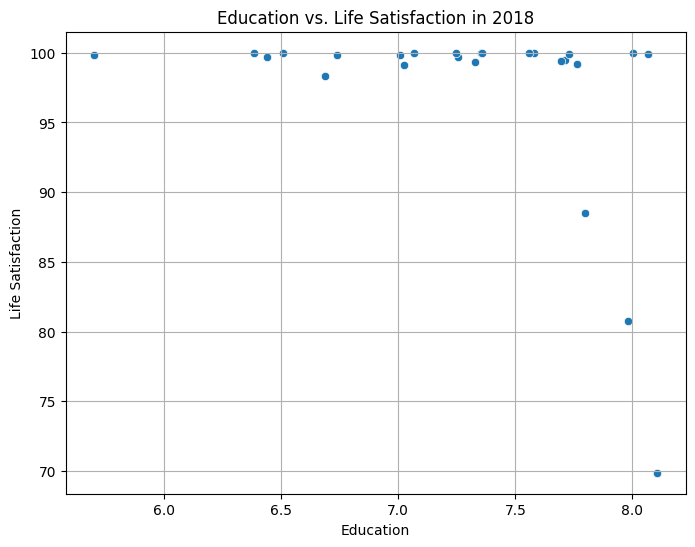

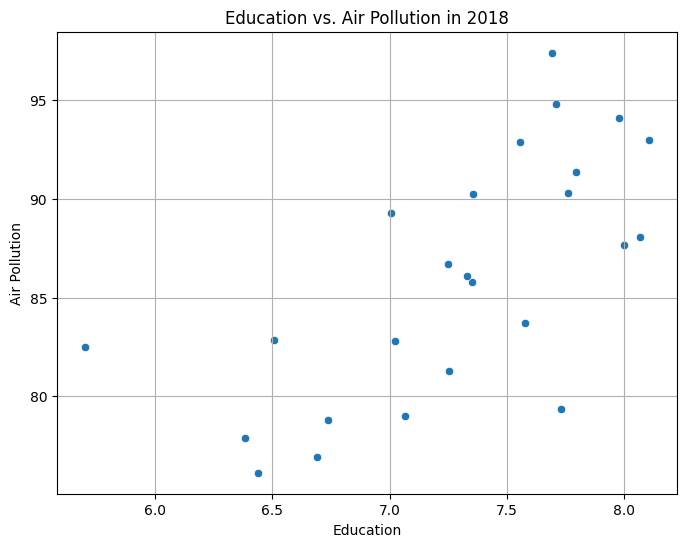

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Education vs Life Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='life_satisfaction')
plt.title('Education vs. Life Satisfaction in 2018')
plt.xlabel('Education')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

# Plot 2: Education vs Air Pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='air_pollution')
plt.title('Education vs. Air Pollution in 2018')
plt.xlabel('Education')
plt.ylabel('Air Pollution')
plt.grid(True)
plt.show()

**Air Pollution** is measured as average annual concentration of **PM2.5 fine particulate matter** in micrograms per cubic meter (µg/m³). Higher values indicate worse air quality.

**Life Satisfaction** ('9_2') is measured as the **percentage of people aged 15 and over who reported being satisfied with their life**. Higher values indicate greater life satisfaction.

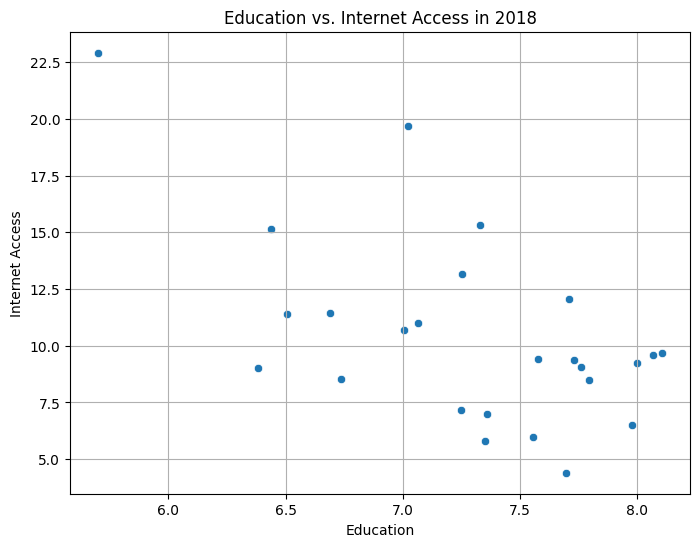

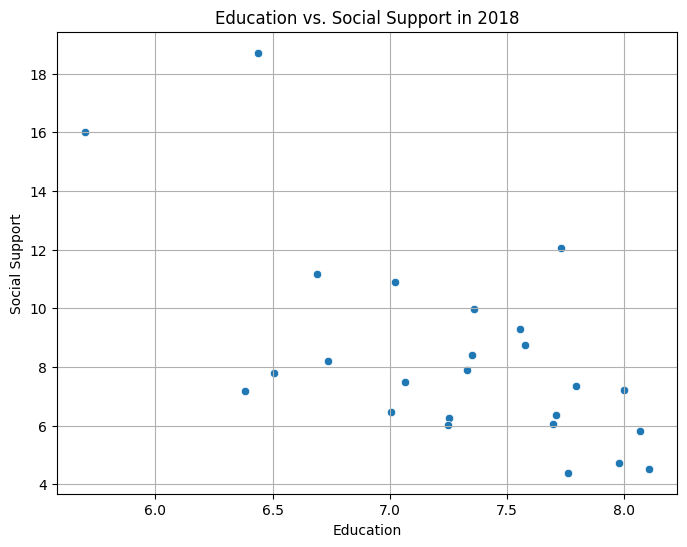

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Education vs Internet Access
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='internet_access')
plt.title('Education vs. Internet Access in 2018')
plt.xlabel('Education')
plt.ylabel('Internet Access')
plt.grid(True)
plt.show()

# Plot: Education vs Social Support
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='social_support')
plt.title('Education vs. Social Support in 2018')
plt.xlabel('Education')
plt.ylabel('Social Support')
plt.grid(True)
plt.show()

**Internet access** is measured in % of homes in that country that have internet access

**social support** is measured in % of that country's population that reported to have someone to count on in times of trouble

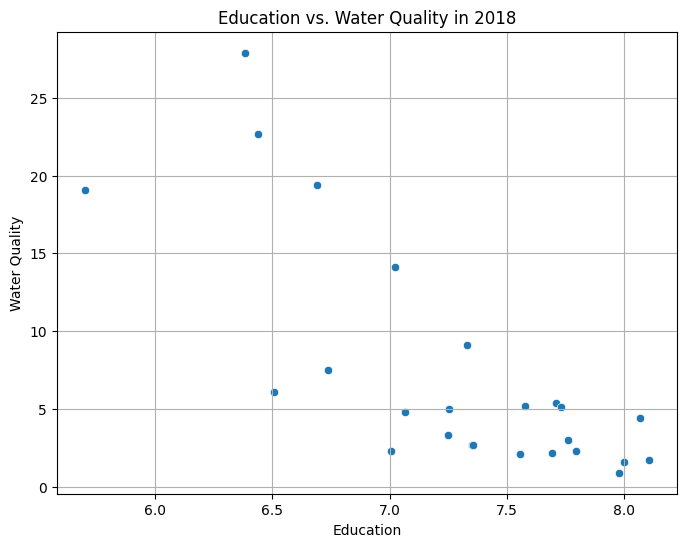

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Education vs Water Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='water_quality')
plt.title('Education vs. Water Quality in 2018')
plt.xlabel('Education')
plt.ylabel('Water Quality')
plt.grid(True)
plt.show()

In [25]:
display(BLIE)

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
56,AUT,2018,87.6856,8.002416,9.220276,99.986755,7.208514,1.6
77,BEL,2018,83.7276,7.580024,9.429950,99.962578,8.764923,5.2
245,CZE,2018,85.7682,7.351978,5.793651,99.999008,8.402266,2.7
266,DEU,2018,90.2508,7.358130,6.987309,99.981888,9.980209,2.7
287,DNK,2018,90.2963,7.761102,9.061315,99.162529,4.395046,3.0
308,ESP,2018,86.1152,7.329371,15.319123,99.298912,7.884422,9.1
329,EST,2018,89.2878,7.005767,10.670861,99.814720,6.476210,2.3
350,FIN,2018,92.9988,8.106845,9.666667,69.879356,4.536716,1.7
371,FRA,2018,81.3062,7.254388,13.178674,99.712212,6.251947,5.0
392,GBR,2018,94.8185,7.710000,12.039447,99.463730,6.349240,5.4


In [26]:
# Mapping of country abbreviations to full names (including only countries present in BLIE 2018)
country_map = {
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CZE': 'Czech Republic',
    'DEU': 'Germany',
    'DNK': 'Denmark',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'IRL': 'Ireland',
    'ITA': 'Italy',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'LVA': 'Latvia',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'SVK': 'Slovak Republic',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'TUR': 'Turkey'
}

# Replace country abbreviations with full names
BLIE['country'] = BLIE['country'].map(country_map)

# Display the updated DataFrame
display(BLIE)

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
56,Austria,2018,87.6856,8.002416,9.220276,99.986755,7.208514,1.6
77,Belgium,2018,83.7276,7.580024,9.429950,99.962578,8.764923,5.2
245,Czech Republic,2018,85.7682,7.351978,5.793651,99.999008,8.402266,2.7
266,Germany,2018,90.2508,7.358130,6.987309,99.981888,9.980209,2.7
287,Denmark,2018,90.2963,7.761102,9.061315,99.162529,4.395046,3.0
308,Spain,2018,86.1152,7.329371,15.319123,99.298912,7.884422,9.1
329,Estonia,2018,89.2878,7.005767,10.670861,99.814720,6.476210,2.3
350,Finland,2018,92.9988,8.106845,9.666667,69.879356,4.536716,1.7
371,France,2018,81.3062,7.254388,13.178674,99.712212,6.251947,5.0
392,United Kingdom,2018,94.8185,7.710000,12.039447,99.463730,6.349240,5.4


In [44]:
BLIE.head()

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support
56,Austria,2018,87.6856,8.002416,9.220276,99.986755,7.208514
77,Belgium,2018,83.7276,7.580024,9.429950,99.962578,8.764923
245,Czech Republic,2018,85.7682,7.351978,5.793651,99.999008,8.402266
266,Germany,2018,90.2508,7.358130,6.987309,99.981888,9.980209
287,Denmark,2018,90.2963,7.761102,9.061315,99.162529,4.395046


Lowest air pollution: GREECE (76.12 µg/m³)

Highest air pollution: Netherlands (97.41 µg/m³)

Highest education level: Finland (8.11 avg years of edu)

Lowest education level: Turkey ( 5.70 avg years of edu)

Highest internet access: Turkey (22.92% of homes)

Lowest internet access: Netherlands (4.40% of homes)

Highest Social Support: Greece (18.71% of people reporting to have social support)

Lowest Social Support: Denmark (4.40% of people reporting to have social support)

Luxembourg has the highest life satisfaction (100.00% of population)

Finland has the lowest life satisfaction (69.88% of population)

In [37]:
print(BLIE.columns)

Index(['country', 'year', 'air_pollution', 'education', 'internet_access',
       'life_satisfaction', 'social_support'],
      dtype='object', name='indicator')


In [48]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = BLIE['education']
# Ensure 'water_quality' is not in X if it was successfully dropped
X = BLIE[['air_pollution', 'internet_access', 'life_satisfaction', 'social_support']]


# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              education   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     7.611
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           0.000675
Time:                        18:23:55   Log-Likelihood:                -11.134
No. Observations:                  25   AIC:                             32.27
Df Residuals:                      20   BIC:                             38.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0868      2.39

In [49]:
import statsmodels.api as sm

# Model 1: Education vs Life Satisfaction
y_ls1 = BLIE['life_satisfaction']
X_edu = BLIE[['education']]
X_edu = sm.add_constant(X_edu) # Add a constant

model_edu_ls = sm.OLS(y_ls1, X_edu).fit()
print("--- Regression Results: Education vs Life Satisfaction ---")
print(model_edu_ls.summary())

print("\n" + "="*80 + "\n") # Separator

# Model 2: Air Pollution vs Life Satisfaction
y_ls2 = BLIE['life_satisfaction']
X_air = BLIE[['air_pollution']]
X_air = sm.add_constant(X_air) # Add a constant

model_air_ls = sm.OLS(y_ls2, X_air).fit()
print("--- Regression Results: Air Pollution vs Life Satisfaction ---")
print(model_air_ls.summary())

--- Regression Results: Education vs Life Satisfaction ---
                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.650
Date:                Fri, 01 Aug 2025   Prob (F-statistic):             0.0418
Time:                        18:29:08   Log-Likelihood:                -81.906
No. Observations:                  25   AIC:                             167.8
Df Residuals:                      23   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

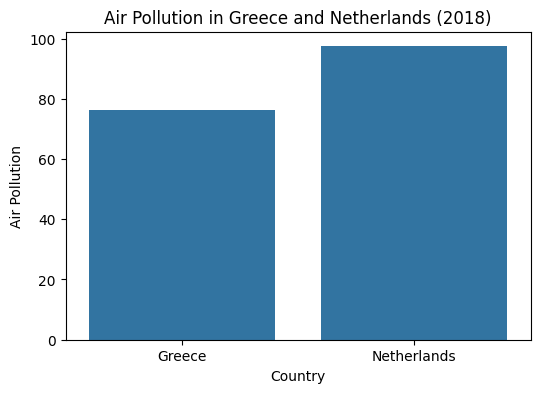

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Greece and Netherlands
df_air_pollution = BLIE[BLIE['country'].isin(['Greece', 'Netherlands'])]

# Create bar plot for Air Pollution
plt.figure(figsize=(6, 4))
sns.barplot(data=df_air_pollution, x='country', y='air_pollution')
plt.title('Air Pollution in Greece and Netherlands (2018)')
plt.xlabel('Country')
plt.ylabel('Air Pollution')
plt.show()

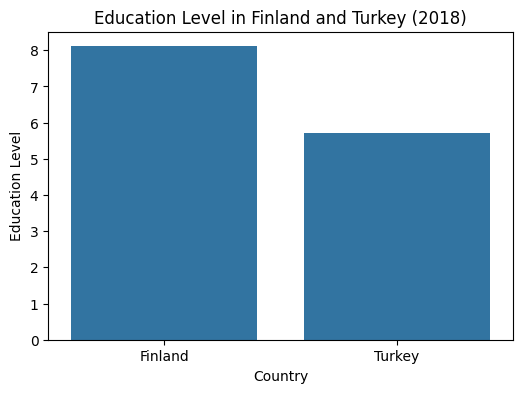

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Finland and Turkey
df_education = BLIE[BLIE['country'].isin(['Finland', 'Turkey'])]

# Create bar plot for Education
plt.figure(figsize=(6, 4))
sns.barplot(data=df_education, x='country', y='education')
plt.title('Education Level in Finland and Turkey (2018)')
plt.xlabel('Country')
plt.ylabel('Education Level')
plt.show()

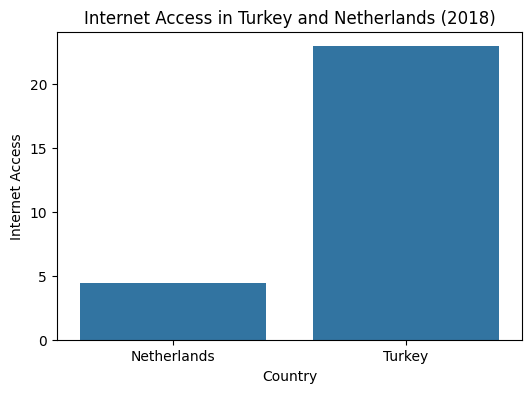

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Turkey and Netherlands
df_internet_access = BLIE[BLIE['country'].isin(['Turkey', 'Netherlands'])]

# Create bar plot for Internet Access
plt.figure(figsize=(6, 4))
sns.barplot(data=df_internet_access, x='country', y='internet_access')
plt.title('Internet Access in Turkey and Netherlands (2018)')
plt.xlabel('Country')
plt.ylabel('Internet Access')
plt.show()

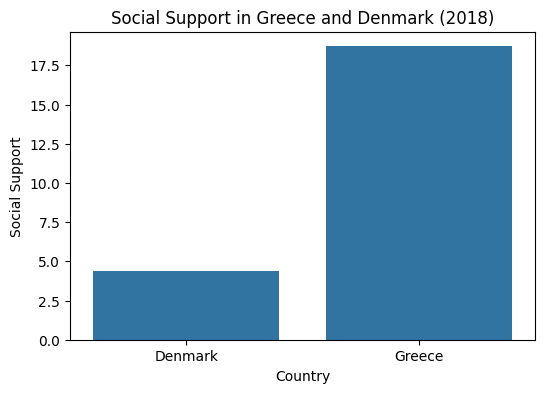

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Greece and Denmark
df_social_support = BLIE[BLIE['country'].isin(['Greece', 'Denmark'])]

# Create bar plot for Social Support
plt.figure(figsize=(6, 4))
sns.barplot(data=df_social_support, x='country', y='social_support')
plt.title('Social Support in Greece and Denmark (2018)')
plt.xlabel('Country')
plt.ylabel('Social Support')
plt.show()

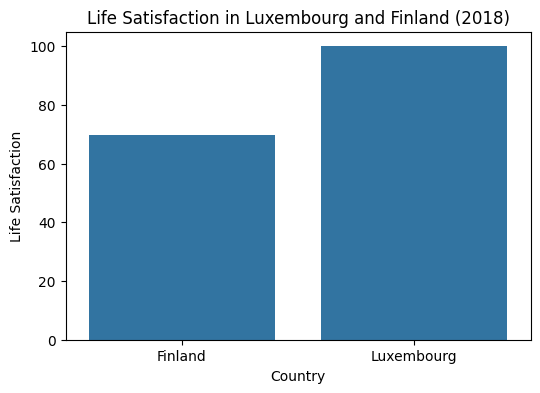

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Luxembourg and Finland
df_life_satisfaction = BLIE[BLIE['country'].isin(['Luxembourg', 'Finland'])]

# Create bar plot for Life Satisfaction
plt.figure(figsize=(6, 4))
sns.barplot(data=df_life_satisfaction, x='country', y='life_satisfaction')
plt.title('Life Satisfaction in Luxembourg and Finland (2018)')
plt.xlabel('Country')
plt.ylabel('Life Satisfaction')
plt.show()

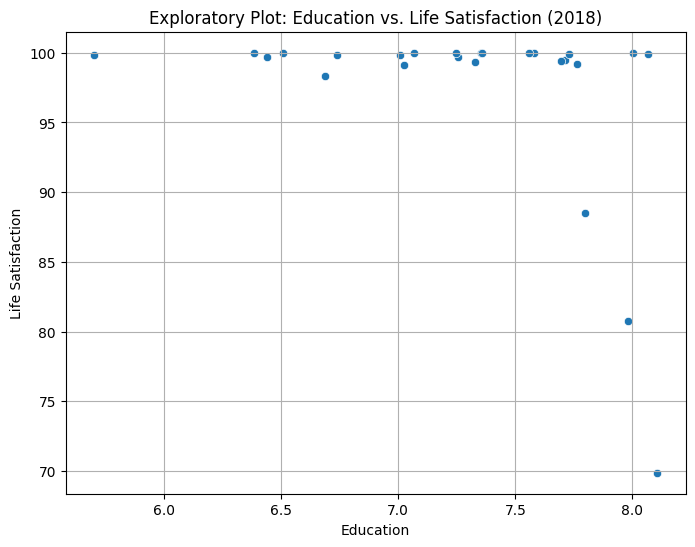

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual 1: Exploratory Scatter Plot - Education vs. Life Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='life_satisfaction')
plt.title('Exploratory Plot: Education vs. Life Satisfaction (2018)')
plt.xlabel('Education')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

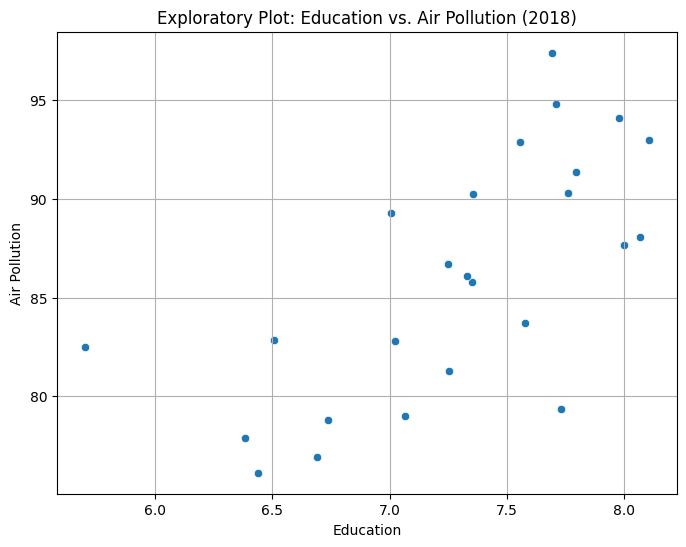

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual 2: Exploratory Scatter Plot - Education vs. Air Pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='air_pollution')
plt.title('Exploratory Plot: Education vs. Air Pollution (2018)')
plt.xlabel('Education')
plt.ylabel('Air Pollution')
plt.grid(True)
plt.show()

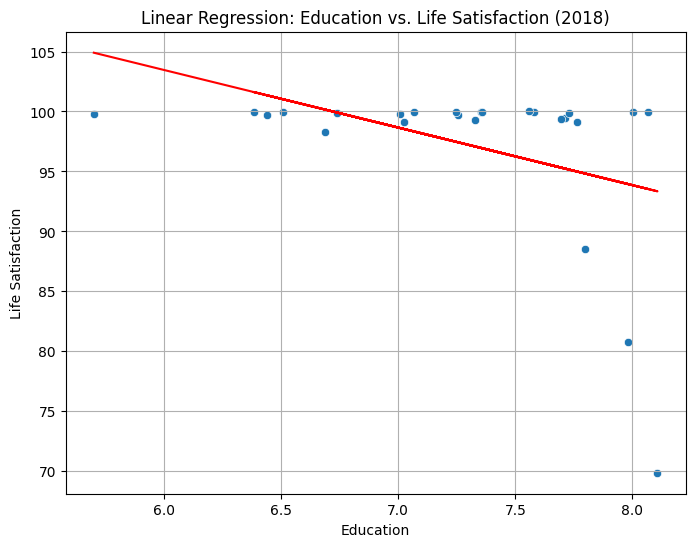

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Visual 3: Linear Regression Plot - Education vs. Life Satisfaction
y_ls = BLIE['life_satisfaction']
X_edu = BLIE[['education']]
X_edu = sm.add_constant(X_edu)
model_edu_ls = sm.OLS(y_ls, X_edu).fit()
regression_line_ls = model_edu_ls.predict(X_edu)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='life_satisfaction')
plt.plot(BLIE['education'], regression_line_ls, color='red')
plt.title('Linear Regression: Education vs. Life Satisfaction (2018)')
plt.xlabel('Education')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

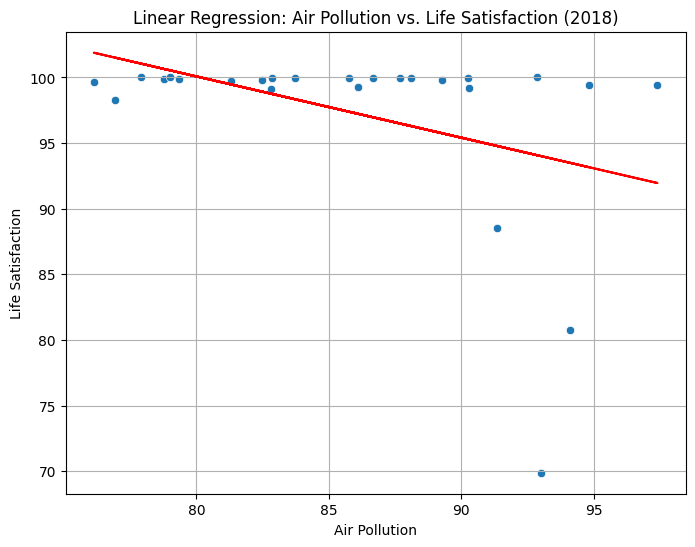

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Visual 4: Linear Regression Plot - Air Pollution vs. Life Satisfaction
y_ls = BLIE['life_satisfaction']
X_air = BLIE[['air_pollution']]
X_air = sm.add_constant(X_air)
model_air_ls = sm.OLS(y_ls, X_air).fit()
regression_line_air = model_air_ls.predict(X_air)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='air_pollution', y='life_satisfaction')
plt.plot(BLIE['air_pollution'], regression_line_air, color='red')
plt.title('Linear Regression: Air Pollution vs. Life Satisfaction (2018)')
plt.xlabel('Air Pollution')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

## Summary of Findings: External Factors, Education, and Life Satisfaction in 2018

This analysis explored the relationships between education levels and several external factors (air pollution, internet access, life satisfaction, and social support) in 2018, and also investigated whether better education correlated with higher life satisfaction, using data from the Better Life Index.

**Key Findings:**

Based on the data for 2018, the following observations were made:

*   **External Factors and Education:** A multiple linear regression analysis was conducted to assess the collective and individual impact of air pollution, internet access, life satisfaction, and social support on education levels. While the overall model was statistically significant, suggesting these factors collectively influence education, individually, none of the factors showed a statistically significant *linear* relationship with education at the 0.05 significance level when controlling for other factors in the model. (Refer to the linear regression output for Education vs. External Factors). The exploratory scatter plot of Education vs. Air Pollution (Visual 2) showed a potential positive trend, although the statistical significance was just above the conventional threshold.

*   **Education and Life Satisfaction:** A linear regression analysis was performed to examine the relationship between education and life satisfaction. The results indicated a statistically significant linear relationship between education and life satisfaction in 2018 (p-value < 0.05). However, the relationship was found to be *inverse*, suggesting that in this dataset for 2018, higher education levels were associated with *lower* life satisfaction. The exploratory scatter plot (Visual 1) and the linear regression plot (Visual 3) visually represent this relationship, showing a downward trend as education increases. This finding addresses the second part of the research question, indicating that in 2018, based on this data, better education did *not* correlate with higher life satisfaction in a simple linear sense, and in fact showed the opposite trend.

*   **Air Pollution and Life Satisfaction:** An additional linear regression was conducted to explore the relationship between air pollution and life satisfaction. This analysis also revealed a statistically significant linear relationship (p-value < 0.05). The relationship was negative, indicating that higher levels of air pollution were associated with lower life satisfaction. The linear regression plot (Visual 4) illustrates this downward trend.

*   **Other Factors:** Exploratory scatter plots did not reveal strong linear relationships between education and internet access or social support (Refer to previous scatter plots if needed).

**Conclusion:**

In 2018, the analysis indicates that while a combination of external factors may influence education, individually, in a multiple linear regression context, none of the examined factors showed a statistically significant linear impact on education. Addressing the second part of the research question, education had a statistically significant, but inverse, linear relationship with life satisfaction. Additionally, air pollution showed a statistically significant negative linear relationship with life satisfaction. These findings are based on the available data for 2018 and highlight potential areas for further investigation, considering other possible influencing factors and different types of relationships.

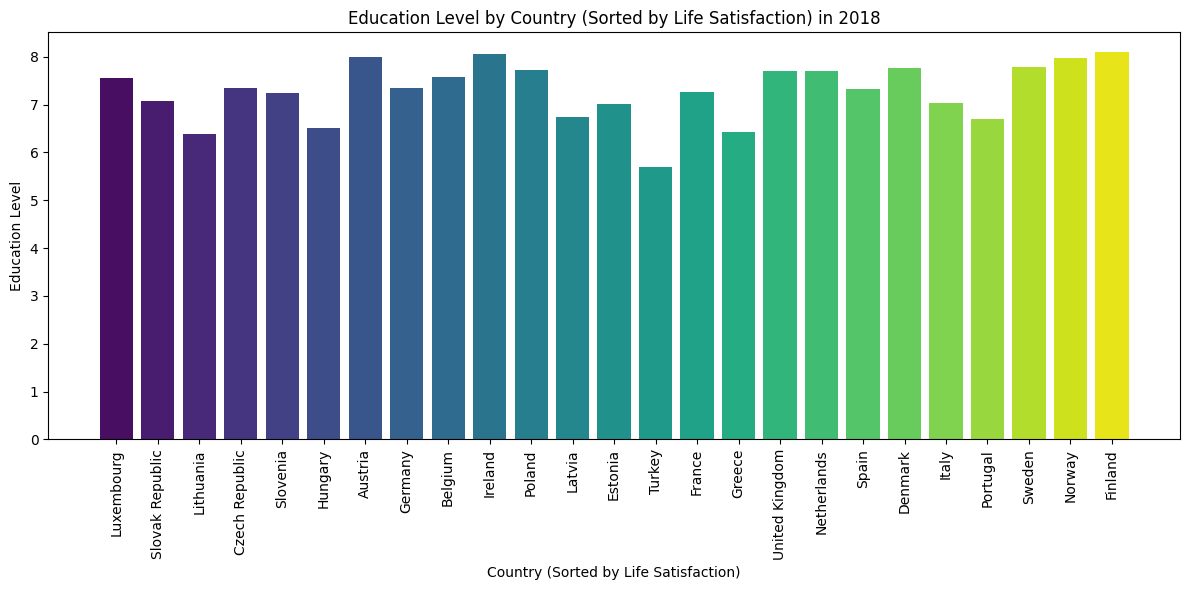

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the DataFrame by life satisfaction
BLIE_sorted_ls = BLIE.sort_values('life_satisfaction', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for readability
plt.bar(BLIE_sorted_ls['country'], BLIE_sorted_ls['education'], color=sns.color_palette("viridis", len(BLIE_sorted_ls)))
plt.xticks(rotation=90) # Rotate country names for readability
plt.xlabel('Country (Sorted by Life Satisfaction)')
plt.ylabel('Education Level')
plt.title('Education Level by Country (Sorted by Life Satisfaction) in 2018')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

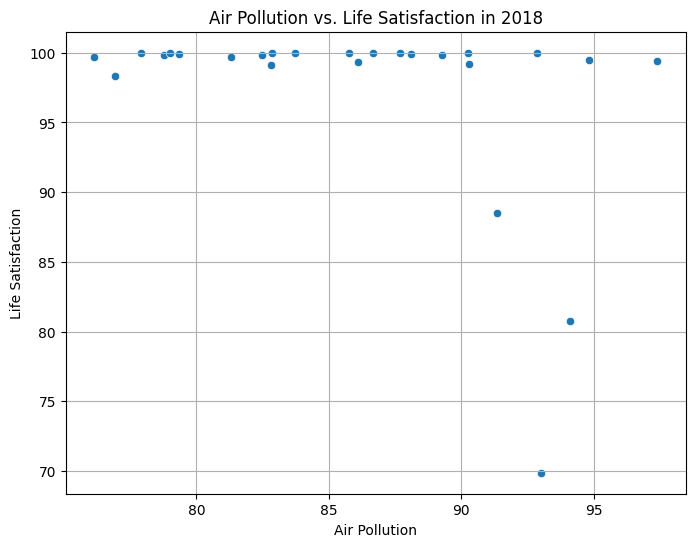

In [67]:
# Filter for countries with Life Satisfaction below a certain threshold (e.g., below 90) to identify potential outliers
outliers = BLIE[BLIE['life_satisfaction'] < 90]

print("Potential outlier countries based on lower Life Satisfaction in 2018:")
display(outliers)

Potential outlier countries based on lower Life Satisfaction in 2018:


indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support
350,Finland,2018,92.9988,8.106845,9.666667,69.879356,4.536716
728,Norway,2018,94.0949,7.980364,6.511153,80.750832,4.714515
896,Sweden,2018,91.3616,7.796567,8.492767,88.500198,7.360855


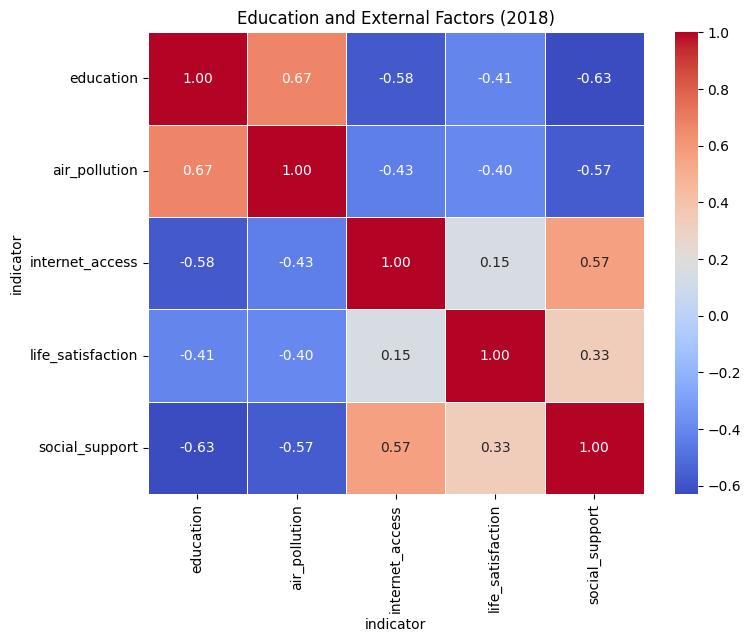

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the relevant columns for correlation analysis
correlation_cols = ['education', 'air_pollution', 'internet_access', 'life_satisfaction', 'social_support']

# Calculate the correlation matrix
correlation_matrix = BLIE[correlation_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title( 'Education and External Factors (2018)')
plt.show()